In [1]:
import numpy as np
import joblib
import pandas as pd
import torch
from torch import nn,optim

In [2]:
with open("X_train.joblib", mode="rb") as f:
    X_train = joblib.load(f)

X_train = torch.tensor(X_train)

with open("y_train.joblib", mode="rb") as f:
    y_train = joblib.load(f)

y_train = torch.tensor(y_train,dtype=torch.long)


with open("X_valid.joblib", mode="rb") as f:
    X_valid = joblib.load(f)

X_valid = torch.tensor(X_valid)

with open("y_valid.joblib", mode="rb") as f:
    y_valid = joblib.load(f)

y_valid = torch.tensor(y_valid,dtype=torch.long)

In [3]:
x1 = X_train
y1 = y_train

model = nn.Linear(x1.size()[1],4,bias=False)

In [12]:
list(model.parameters())[0].shape

torch.Size([4, 300])

In [5]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [6]:
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

In [7]:
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X_train)
    out = loss_func(y_pred,y1)
    out.backward()
    optimizer.step()
    
    joblib.dump(model.state_dict(), f'state_dict_{epoch}.joblib')
    
    train_loss.append(out)
    valid_loss.append(loss_func(model(X_valid),y_valid))
    
    y_pred_train = torch.max(model(X_train),1)[1]
    y_pred_valid = torch.max(model(X_valid),1)[1]
    train_acc.append((y_pred_train == y1).sum().item() / len(y1))
    valid_acc.append((y_pred_valid == y_valid).sum().item() / len(y_valid))

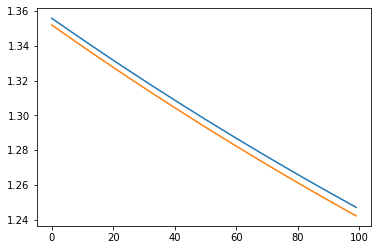

In [10]:
plt.plot(range(100),train_loss)
plt.plot(range(100),valid_loss)

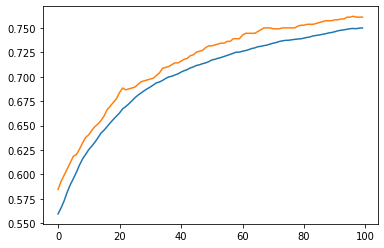

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(100),train_acc)
plt.plot(range(100),valid_acc)